![image](https://github.com/anna-kryva/ML_KPi_labs/blob/master/lab-4/images/title.png?raw=true)

# Завдання до лабораторної роботи №3  

### Хід виконання роботи (варіант 5, КА-75):  
1. Взяти дані з роботи № 2 згідно з варіантом. Представити дані графічно.  
2. Побудувати моделі нейронних мереж, використовуючи клас MLPClassifier, для класифікації згідно з варіантом.  
Дослідити вплив різних параметрів MLPClassifier, згідно з варіантом, на результат класифікації:
  
* Дослідити вплив різних значень параметру регуляризації `alpha` класу MLPClassifier на результат класифікації.  
* Використати `early_stopping=True`.  
* Вивести значення функції втрат на декількох перших і декількох останніх ітераціях.  
* Вивести значення середньої точності класифікації на навчальній і тестовій множинах, використовуючи `score`.  

3. Виконати прогнози на основі моделей нейронних мереж.  
4. Зробити висновки про якість роботи моделей нейронних мереж на досліджених даних. В задачах класифікації для кожної навчальної вибірки вибрати найкращу модель за критеріями якості:  

* матриця неточностей (confusion matrix),  
* точність (precision),  
* повнота (recall),  
* міра F1 (F1 score),  
* ROC-крива, показник AUC.  

5. Побудувати ансамблі моделей, використовуючи наступні методи згідно з варіантом:  

* `AdaBoostClassifier`. Розглянути різні значення параметрів `learning_rate` та `algorithm`.  
* `ExtraTreesClassifier`. Розглянути різні значення параметрів `max_depth`,
`max_features`, `min_samples_split`.  

6. Побудувати ансамблі `AdaBoost` на основі найпростіших моделей:  

*   В якості `base_estimator`/`estimators` використати одну/декілька  найпростіших моделей заданих за варіантом: дерев рішень та нейронних мереж. Порівняти значення мір F1_score та AUC для ансамблів та окремих моделей, які утворюють ансамбль (модель `base_estimator`/моделі `estimators`). Порівняти декілька ансамблів, які утворені на основі одних `estimators` і відрізняються значеннями параметрів.  
*   Побудувати графіки залежності значень помилок класифікації `accuracy_score` або `zero_one_loss` від значення `n_estimators` для досліджених ансамблів та окремих моделей на одній координатній вісі.  
*   В задачах класифікації побудувати графіки залежності значень міри `F1_score` від значення `n_estimators` для досліджених ансамблів та окремих моделей на одній координатній вісі. Графіки для окремих моделей, очевидно, будуть горизонтальними прямими.  
*   В задачах класифікації відобразити границі рішень `decision boundaries` на основі `base_estimator`/`estimators` та на основі досліджених ансамблів.  

7. Побудувати ансамблi на основi найкращої моделi / моделей нейронних мереж, знайдених на попереднiх етапах даної роботи, та найкращої моделi / моделей, знайдених у роботi №2.   
Порiвняти результати класифiкацiї, значення мiр `F1_score` та `AUC` для ансамблiв та окремих моделей, якi утворюють цi ансамблi.   

#### Початкові дані:  
**(а)** `sklearn.datasets.load_digits`  
**(б)** `sklearn.datasets.make_moons`  

## Хід роботи  

### 1. Взяти дані з роботи № 2 згідно з варіантом. Представити дані графічно.  

#### (a) Load_digits

In [0]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()
n_samples1 = len(digits.images)
X1, y1 = digits.data, digits.target

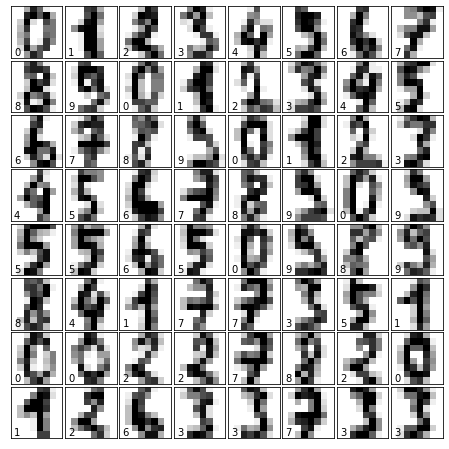

In [36]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(y1[i]))

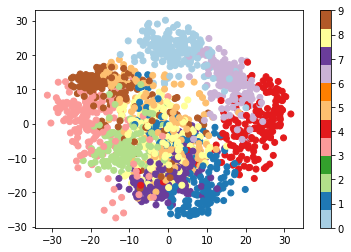

In [37]:
from sklearn.decomposition import PCA

plt.figure()
pca = PCA(n_components=2)
proj = pca.fit_transform(X1)
plt.scatter(proj[:, 0], proj[:, 1], c=y1, cmap="Paired")
plt.colorbar()

#### (b) Make_moons

In [0]:
from sklearn.datasets import make_moons
from pandas import DataFrame

X2, y2 = make_moons(n_samples=1000, noise=0.2)
n_samples2 = len(y2)

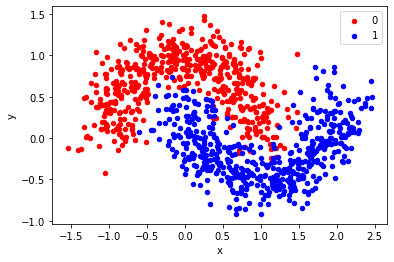

In [12]:
df = DataFrame(dict(x=X2[:,0], y=X2[:,1], label=y2))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

### 2. Побудувати моделі нейронних мереж, використовуючи клас MLPClassifier, для класифікації.   
Оскільки багатошаровий персептрон чутливий до масштабування вхідних даних, то спочатку їх потрібно підготувати.  
Приведемо датасети до нульового середнього та одиничної дисперсії за допомогою методу `StandardScaler`.

In [0]:
from sklearn.preprocessing import StandardScaler

X1 = StandardScaler().fit_transform(X1)
X2 = StandardScaler().fit_transform(X2)

Розбиваємо дані у наступному співвідношенні: 80% - дані для тренування, 20% - дані для перевірки.

In [40]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = \
    train_test_split(X1, y1, test_size=0.2, random_state=0)

print(f'Number of samples in training digits dataset: {len(y1_train)}')
print(f'Number of samples in test digits dataset: {len(y1_test)}')

Number of samples in training digits dataset: 1437
Number of samples in test digits dataset: 360


In [41]:
X2_train, X2_test, y2_train, y2_test = \
    train_test_split(X2, y2, test_size=0.2, random_state=0)

print(f'Number of samples in training make_moons dataset: {len(y2_train)}')
print(f'Number of samples in test make_moons dataset: {len(y2_test)}')

Number of samples in training make_moons dataset: 800
Number of samples in test make_moons dataset: 200


Побудуємо моделі нейронної мережі, використовуючи клас MLPClassifier.  
**Ключові параметри:**  
* `hidden_layer_sizes` - кількість прихованих шарів і нейронів для кожного прихованого шару. Наприклад, `hidden_layer_sizes=(5,3,3)` означає, що існує 3 прихованих шару, а кількість нейронів для першого шару - 5, другого - 3, а для третього - відповідно 3. Значенням за замовчуванням є `(100,)`, тобто один прихований шар із 100 нейронами.  
* `activation` - це функція активації для прихованого шару, і для роботи є чотири функції активації, за замовчуванням - «relu»:  

> * `relu` - передавальна функція - 'функція-випрямляч', повертає `f(x)=max(0,x)`;  
> * `logistic` - логістична сигмоїдна функція, повертає `f(x)=1/(1+exp(-x))`;  
> * `identity` - відсутність операції активації, корисна для реалізації лінійного вузького місця, повертає `f(x)=x`;  
> * `tanh` - гіперболічна функція тангенсу, повертає `f(x)=tanh(x)`.  

* `solver` - для оптимізації ваг, є три варіанти, за замовчуванням `adam`:  

> * `adam` - стохастичний оптимізатор на основі градієнта, який добре працює для великих наборів даних;  
> * `lbfgs` - належить до сімейства квазі-ньютонівських методів, працює добре для невеликих наборів даних;  
> * `sgd` - стохастичний градієнтний спуск.   

* `max_iter` – максимальна кількість ітерацій для solver, щоб 'сходитися', за замовчуванням 200.
* `learning_rate` – швидкість навчання для оновлення ваг, є три варіанти, за замовчуванням `constant`:  

> * `constant` - постійна швидкість навчання, задана параметром `learning_rate_init`;  
> * `invscaling` - поступово знижує швидкість навчання на кожному кроці `t` за допомогою зворотного показника масштабування `power_t`: `effective_learning_rate=learning_rate_init/pow(t,power_t)`;  
> * `adaptive` - тримає постійну швидкість навчання `learning_rate_init` до тих пір, поки втрати навчання постійно зменшуються. Кожен раз, коли двом послідовним епохам не вдається зменшити втрати або не збільшити бал валідації, якщо `early_stopping=true`, поточна швидкість навчання ділиться на 5.

* `alpha` - штраф регуляризації L2.  





Щоб вибрати параметри, попередньо побудувала моделі з різними параметрами. Згідно графікам функції витрат обирала найкащий результат.   
Для цього потрібні наступні дві фунції:  
* `get_mlps` - дає на вихід моделі, які натренеровані на заданих даних з заданими параметрами;
* `plot_loss_curve` - будує графіки функції витрат моделей.

In [0]:
def get_mlps(X_train, y_train, X_test, y_test, params, 
             labels, max_iter, verbose=False):
  mlps = []
  
  for label, param in zip(labels, params):
    print("training: %s" % label)
    mlp = MLPClassifier(max_iter=max_iter, verbose=verbose, **param)

    # some parameter combinations will not converge as can be seen on the
    # plots so they are ignored here
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning,
                                module="sklearn")
        mlp.fit(X_train, y_train)

    mlps.append(mlp)
    print(f"Training set score: {mlp.score(X_train, y_train)}")
    print(f"Test set score: {mlp.score(X_test, y_test)}")
  
  return mlps

In [0]:
def plot_loss_curve(name, mlps, labels, plot_args):
  plt.figure(figsize=(10,6))
  plt.title(name)

  for mlp, label, args in zip(mlps, labels, plot_args):
    plt.plot(mlp.loss_curve_, label=label, **args)

  plt.legend(labels)
  plt.show()

Для вибору ключових параметрів побудуємо функції витрат. Для цього розглянемо графіки функцій витрат в залежності від заданих різних параметрів.  
Також, згідно документації та наданих прикладів на сайті [scikit-learn](https://scikit-learn.org/), виберемо заздалегідь деякі параметри.  

**Перший датасет load_digits**  
Порівнюючи гріфки витрат для різних параметрів у [прикладі на scikit-learn](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py), були вибрані наступні параметри: 
1. `solver='sgd'`;  
2. `learning_rate='constant'`;  
3. `learning_rate_init=0.1` - можна вибрати інше значення, але воно є оптимальним згідно [цього прикладу](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py); 
4. `max_iter=30` - швидко сходиться для цього датасету, тому непотрібна велика кількість ітерацій;  
5. `early_stopping=True` - вказано у завдані.  

Отже, потрібно дізнатися параметр `hidden_layer_sizes`. Параметр `alpha` за завданням буде розглянуто пізніше. При виборі `hidden_layer_sizes` параметр `alpha` буде приймати значення за замовчуванням.

training: hidden_layer_sizes=(10,)
Training set score: 0.9916492693110647
Test set score: 0.9388888888888889
training: hidden_layer_sizes=(64,)
Training set score: 0.9951287404314544
Test set score: 0.9638888888888889
training: hidden_layer_sizes=(100,)
Training set score: 0.9979123173277662
Test set score: 0.9777777777777777
training: hidden_layer_sizes=(10, 10, 10)
Training set score: 0.9791231732776617
Test set score: 0.9083333333333333
training: hidden_layer_sizes=(64, 32, 10)
Training set score: 0.9986082115518441
Test set score: 0.9666666666666667
training: hidden_layer_sizes=(100, 64, 32, 10)
Training set score: 0.9965205288796103
Test set score: 0.9611111111111111


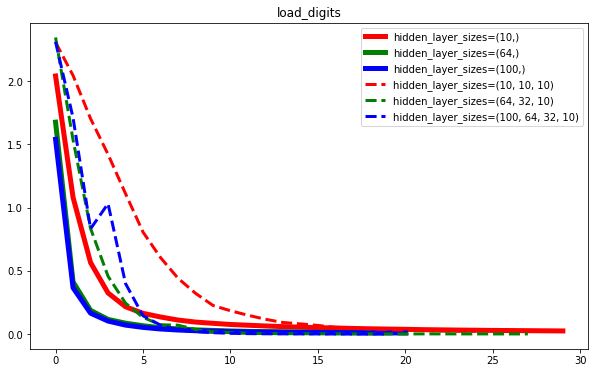

In [44]:
import warnings
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning

default_params = {'solver': 'sgd', 'learning_rate': 'constant', 
                   'learning_rate_init': 0.1, 'early_stopping': True}

params = [{'hidden_layer_sizes': (10,), **default_params},
          {'hidden_layer_sizes': (64,), **default_params},
          {'hidden_layer_sizes': (100,), **default_params},
          {'hidden_layer_sizes': (10, 10, 10), **default_params},
          {'hidden_layer_sizes': (64, 32, 10), **default_params},
          {'hidden_layer_sizes': (100, 64, 32, 10), **default_params}]

labels = ["hidden_layer_sizes=(10,)", "hidden_layer_sizes=(64,)", 
          "hidden_layer_sizes=(100,)", "hidden_layer_sizes=(10, 10, 10)", 
          "hidden_layer_sizes=(64, 32, 10)", 
          "hidden_layer_sizes=(100, 64, 32, 10)"]

plot_args = [{'c': 'red', 'linestyle': '-', 'linewidth': 5.0},
             {'c': 'green', 'linestyle': '-', 'linewidth': 5.0},
             {'c': 'blue', 'linestyle': '-', 'linewidth': 5.0},
             {'c': 'red', 'linestyle': '--', 'linewidth': 3.0},
             {'c': 'green', 'linestyle': '--', 'linewidth': 3.0},
             {'c': 'blue', 'linestyle': '--', 'linewidth': 3.0}]

mlps = get_mlps(X1_train, y1_train, X1_test, y1_test, params, labels, 30)
plot_loss_curve('load_digits', mlps, labels, plot_args)

Отже, можна зробити висновок, що параметр `hidden_layer_sizes` повинен приймати значення 100 або 64. Для економії обчислювальних потужностей виберемо значення 64.

**Другий датасет make_moons**    
Згідно з тими самими прикладами, які наведені для першого датасету, з сайту scikit-learn, виберемо наступні значення параметрів:  
1. `solver='adam'`;
2. `learning_rate_init=0.01`;
3. `max_iter=100` - оптимальне значення, знайдене перебором;
4. `early_stopping=True`;
5. `learning_rate='constant'` - за замовчуванням;

Отже, потрібно дізнатися параметр `hidden_layer_sizes`. Параметр `alpha` за завданням буде розглянуто пізніше. При виборі `hidden_layer_sizes` параметр `alpha` буде приймати значення за замовчуванням.

In [19]:
default_params = {'solver': 'adam', 'learning_rate': 'constant', 
                   'learning_rate_init': 0.01, 'early_stopping': True}

params = [{'hidden_layer_sizes': (10,), **default_params},
          {'hidden_layer_sizes': (50,), **default_params},
          {'hidden_layer_sizes': (100,), **default_params},
          {'hidden_layer_sizes': (10, 5, 2), **default_params},
          {'hidden_layer_sizes': (50, 10, 2), **default_params},
          {'hidden_layer_sizes': (100, 50, 10, 2), **default_params}]

labels = ["hidden_layer_sizes=(10,)", "hidden_layer_sizes=(50,)", 
          "hidden_layer_sizes=(100,)", "hidden_layer_sizes=(10, 5, 2)", 
          "hidden_layer_sizes=(50, 10, 2)", 
          "hidden_layer_sizes=(100, 50, 10, 2)"]

plot_args = [{'c': 'red', 'linestyle': '-', 'linewidth': 3.0},
             {'c': 'green', 'linestyle': '-', 'linewidth': 3.0},
             {'c': 'blue', 'linestyle': '-', 'linewidth': 3.0},
             {'c': 'red', 'linestyle': '--', 'linewidth': 3.0},
             {'c': 'green', 'linestyle': '--', 'linewidth': 3.0},
             {'c': 'blue', 'linestyle': '--', 'linewidth': 3.0}]

mlps = get_mlps(X2_train, y2_train, X2_test, y2_test, params, labels, 100)

training: hidden_layer_sizes=(10,)
Training set score: 0.86875
Test set score: 0.87
training: hidden_layer_sizes=(50,)
Training set score: 0.86
Test set score: 0.865
training: hidden_layer_sizes=(100,)
Training set score: 0.95875
Test set score: 0.96
training: hidden_layer_sizes=(10, 5, 2)
Training set score: 0.96
Test set score: 0.96
training: hidden_layer_sizes=(50, 10, 2)
Training set score: 0.965
Test set score: 0.965
training: hidden_layer_sizes=(100, 50, 10, 2)
Training set score: 0.9675
Test set score: 0.985


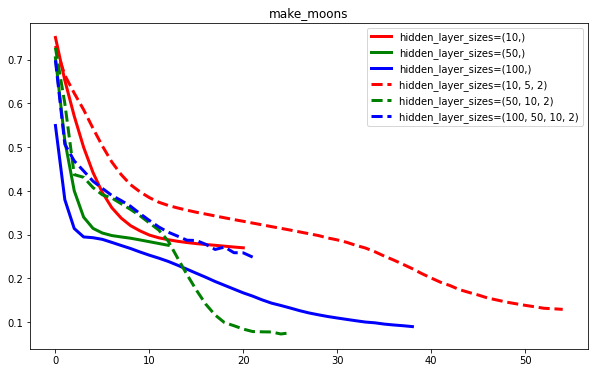

In [20]:
plot_loss_curve('make_moons', mlps, labels, plot_args)

Декілька разів виконавши процедуру та порівнявши значення фунціїї витрат, а також метрик якості, стабільний результат з високою точністю дав параметр `hidden_layer_sizes=(100,)`.  

#### Дослідити вплив різних значень параметру регуляризації `alpha` класу MLPClassifier на результат класифікації.  
Аналогічно використаємо наведені вище функції для дослідження впливу параметру `alpha`.  
Даний параметр будемо розглядати зі значеннями `10.0 ** (range(1,7))`.  

In [0]:
alphas = [10 ** (-i) for i in range(1, 7)]

**Датасет load_digits**

training: alpha=0.1
Training set score: 0.9916492693110647
Test set score: 0.9638888888888889
training: alpha=0.01
Training set score: 0.9944328462073765
Test set score: 0.9694444444444444
training: alpha=0.001
Training set score: 0.9972164231036882
Test set score: 0.9722222222222222
training: alpha=0.0001
Training set score: 0.9832985386221295
Test set score: 0.9611111111111111
training: alpha=1e-05
Training set score: 0.9986082115518441
Test set score: 0.9722222222222222
training: alpha=1e-06
Training set score: 0.9937369519832986
Test set score: 0.9611111111111111


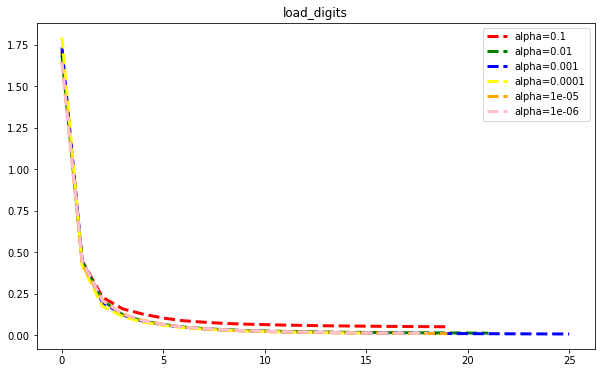

In [22]:
default_params = {'hidden_layer_sizes': (64,), 'solver': 'sgd', 
                  'learning_rate': 'constant', 'learning_rate_init': 0.1, 
                  'early_stopping': True}

params = [{'alpha': alpha, **default_params} for alpha in alphas]

labels = [f'alpha={alpha}' for alpha in alphas]

colors = ['red', 'green', 'blue', 'yellow', 'orange', 'pink']
plot_args = [{'c': color, 'linestyle': '--', 'linewidth': 3.0} 
             for color in colors]


mlps = get_mlps(X1_train, y1_train, X1_test, y1_test, params, labels, 30)
plot_loss_curve('load_digits', mlps, labels, plot_args)

Як видно з фунції витрат та метрик якості, значення `alpha=0.1` дає гірший результат, ніж менші значення. айоптимальніший результат отримується при  параметрі `alpha=0.001`.  

**Датасет make_moons**

training: alpha=0.1
Training set score: 0.94125
Test set score: 0.93
training: alpha=0.01


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Training set score: 0.96375
Test set score: 0.965
training: alpha=0.001
Training set score: 0.9625
Test set score: 0.955
training: alpha=0.0001
Training set score: 0.9675
Test set score: 0.97
training: alpha=1e-05
Training set score: 0.91
Test set score: 0.925
training: alpha=1e-06
Training set score: 0.9125
Test set score: 0.92


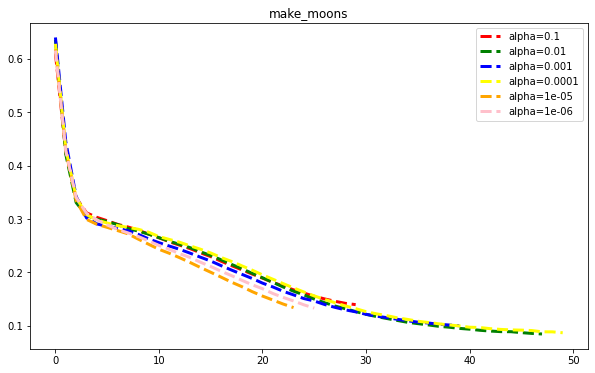

In [23]:
default_params = {'hidden_layer_sizes': (100,), 'solver': 'adam', 
                  'learning_rate': 'constant', 'learning_rate_init': 0.01, 
                  'early_stopping': True}

params = [{'alpha': alpha, **default_params} for alpha in alphas]

labels = [f'alpha={alpha}' for alpha in alphas]

colors = ['red', 'green', 'blue', 'yellow', 'orange', 'pink']
plot_args = [{'c': color, 'linestyle': '--', 'linewidth': 3.0} 
             for color in colors]


mlps = get_mlps(X2_train, y2_train, X2_test, y2_test, params, labels, 100)
plot_loss_curve('make_moons', mlps, labels, plot_args)

Прогнавши модель декілька разів найоптимальніший результат дає параметр `alpha=0.0001`

**Фінальна модель MLPClassifier для датасету load_digits має наступні параметри**:  
1. `hidden_layer_sizes=(64,)`;  
2. `solver='sgd'`;  
3. `learning_rate='constant'`;  
4. `learning_rate_init=0.1`;  
5. `alpha=0.001`;  
6. `max_iter=30`;  
7. `early_stopping=True`.  

**Фінальна модель MLPClassifier для датасету make_moons має наступні параметри**:  
1. `hidden_layer_sizes=(100,)`;  
2. `solver='adam'`;  
3. `learning_rate='constant'`;  
4. `learning_rate_init=0.01`;  
5. `alpha=0.0001`;  
6. `max_iter=100`;  
7. `early_stopping=True`.  

In [24]:
params1 = {'hidden_layer_sizes': (64,), 'solver': 'sgd', 
           'learning_rate': 'constant', 'max_iter': 30, 
           'early_stopping': True, 'alpha': 0.001,
           'learning_rate_init': 0.1}

mlp1 = MLPClassifier(verbose=True, **params1)
mlp1.fit(X1_train, y1_train)

Iteration 1, loss = 1.63629471
Validation score: 0.847222
Iteration 2, loss = 0.41113097
Validation score: 0.916667
Iteration 3, loss = 0.18844715
Validation score: 0.937500
Iteration 4, loss = 0.11723030
Validation score: 0.958333
Iteration 5, loss = 0.07919550
Validation score: 0.979167
Iteration 6, loss = 0.05818494
Validation score: 0.979167
Iteration 7, loss = 0.04394968
Validation score: 0.972222
Iteration 8, loss = 0.03596632
Validation score: 0.972222
Iteration 9, loss = 0.03017415
Validation score: 0.979167
Iteration 10, loss = 0.02609095
Validation score: 0.979167
Iteration 11, loss = 0.02272761
Validation score: 0.979167
Iteration 12, loss = 0.01974188
Validation score: 0.979167
Iteration 13, loss = 0.01792629
Validation score: 0.979167
Iteration 14, loss = 0.01599249
Validation score: 0.979167
Iteration 15, loss = 0.01478528
Validation score: 0.979167
Iteration 16, loss = 0.01340918
Validation score: 0.979167
Validation score did not improve more than tol=0.000100 for 10 co

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(64,), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=30, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [65]:
params2 = {'hidden_layer_sizes': (100,), 'solver': 'adam', 
           'learning_rate': 'constant', 'max_iter': 100, 
           'early_stopping': True, 'alpha': 0.0001,
           'learning_rate_init': 0.01}

mlp2 = MLPClassifier(verbose=True, **params2)
mlp2.fit(X2_train, y2_train)

Iteration 1, loss = 0.65792793
Validation score: 0.862500
Iteration 2, loss = 0.46775310
Validation score: 0.862500
Iteration 3, loss = 0.36148955
Validation score: 0.862500
Iteration 4, loss = 0.32182166
Validation score: 0.862500
Iteration 5, loss = 0.30660081
Validation score: 0.862500
Iteration 6, loss = 0.29954836
Validation score: 0.862500
Iteration 7, loss = 0.29220798
Validation score: 0.887500
Iteration 8, loss = 0.28619897
Validation score: 0.875000
Iteration 9, loss = 0.28080131
Validation score: 0.887500
Iteration 10, loss = 0.27289614
Validation score: 0.912500
Iteration 11, loss = 0.26311906
Validation score: 0.912500
Iteration 12, loss = 0.25504416
Validation score: 0.925000
Iteration 13, loss = 0.24813485
Validation score: 0.937500
Iteration 14, loss = 0.24018867
Validation score: 0.950000
Iteration 15, loss = 0.23146246
Validation score: 0.950000
Iteration 16, loss = 0.22267819
Validation score: 0.950000
Iteration 17, loss = 0.21270179
Validation score: 0.962500
Iterat

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

Побудуємо функції витрат для обох датасетів

load_digits dataset
Training set score: 0.9860821155184412
Test set score: 0.9694444444444444

make_moons dataset
Training set score: 0.9575
Test set score: 0.96


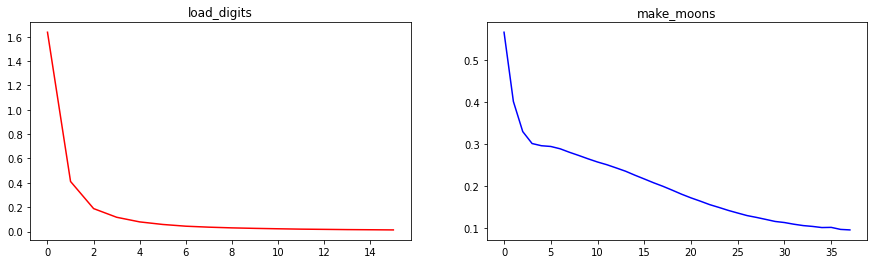

In [26]:
print('load_digits dataset')
print(f"Training set score: {mlp1.score(X1_train, y1_train)}")
print(f"Test set score: {mlp1.score(X1_test, y1_test)}")

print('\nmake_moons dataset')
print(f"Training set score: {mlp2.score(X2_train, y2_train)}")
print(f"Test set score: {mlp2.score(X2_test, y2_test)}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
ax1.set_title('load_digits')
ax2.set_title('make_moons')
ax1.plot(mlp1.loss_curve_, c='red')
ax2.plot(mlp2.loss_curve_, c='blue')
plt.show()

### 3. Виконати прогнози на основі моделей нейронних мереж.  

In [0]:
train_predictions1 = mlp1.predict(X1_train)
test_predictions1 = mlp1.predict(X1_test)
score1 = mlp1.score(X1_test, y1_test)

train_predictions2 = mlp2.predict(X2_train)
test_predictions2 = mlp2.predict(X2_test)
score2 = mlp2.score(X2_test, y2_test)

### 4. Зробити висновки про якість роботи моделей нейронних мереж на досліджених даних.  

#### 1) Матриця неточностей (confusion matrix)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


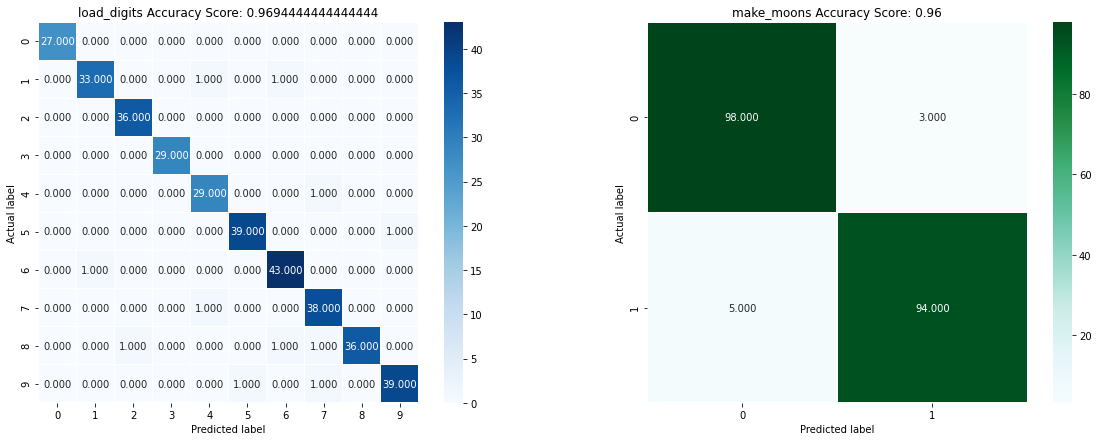

In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

cm1 = confusion_matrix(y1_test, test_predictions1)
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, 
            square = True, cmap = 'Blues', ax=ax1)

cm2 = confusion_matrix(y2_test, test_predictions2)
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=.5, 
            square = True, cmap = 'BuGn', ax=ax2)

ax1.set_title(f'load_digits Accuracy Score: {score1}')
ax2.set_title(f'make_moons Accuracy Score: {score2}')

ax1.set_ylabel('Actual label')
ax1.set_xlabel('Predicted label')
ax2.set_ylabel('Actual label')
ax2.set_xlabel('Predicted label')

plt.show()

#### 2) Точность (precision), повноту (recall), міру F1 (F1 score)

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

ps1 = precision_score(y1_test, test_predictions1, average='micro')
ps2 = precision_score(y2_test, test_predictions2, average='micro')

rs1 = recall_score(y1_test, test_predictions1, average='micro')
rs2 = recall_score(y2_test, test_predictions2, average='micro')

fs1 = f1_score(y1_test, test_predictions1, average='micro')
fs2 = f1_score(y2_test, test_predictions2, average='micro')

print('\t\t', 'precision', 'recall', '\tf1-score', sep="\t")
print('Load_digits:', ps1, rs1, fs1, sep="\t\t")
print('Make_moons:', ps2, rs2, fs2, sep="\t\t")

			precision	recall		f1-score
Load_digits:		0.9694444444444444		0.9694444444444444		0.9694444444444444
Make_moons:		0.96		0.96		0.96


#### 3) ROC-криву, показник AUC

Text(0.5, 1.0, 'ROC curve (make_moons)')

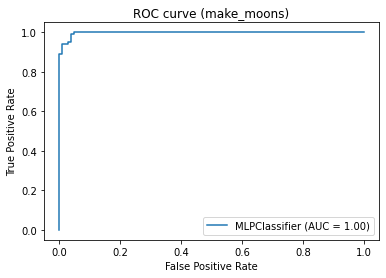

In [30]:
from sklearn.metrics import plot_roc_curve

roc_curve2 = plot_roc_curve(mlp2, X2_test, y2_test)
roc_curve2.ax_.set_title('ROC curve (make_moons)')

Для того, щоб порахувати оцінку AUC потрібно змінити розмір масиву цільвої змінної. Для цього використаємо бібліотеку OneHotEncoder.

In [0]:
def onehot_encode(y_true, prediction):
  onehot_encoder = OneHotEncoder(sparse=False)
  y_encoded = y_true.reshape(-1, 1)
  onehot_encoded_true = onehot_encoder.fit_transform(y_encoded)
  prediction_encoded = prediction.reshape(-1, 1)
  onehot_encoded_prediction = onehot_encoder.fit_transform(prediction_encoded)

  return onehot_encoded_true, onehot_encoded_prediction

In [64]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder

onehot_encoded_test, onehot_encoded_predict = \
  onehot_encode(y1_test, test_predictions1 )

auc1 = roc_auc_score(onehot_encoded_test, onehot_encoded_predict, 
                     multi_class='ovr')
auc2 = roc_auc_score(y2_test, test_predictions2)

print('\t', 'AUC', sep="\t")
print('Load_digits:', auc1, sep="\t")
print('Make_moons:', auc2, sep="\t")

		AUC
Load_digits:	0.9838146646491062
Make_moons:	0.4852941176470589


Беручи до уваги усі пораховані метрики якості, можна сказати, що обидві моделі спрацювали добре та показали високу точність прогнозування (>95%). Це означає, що параметри для моделей були підібрані добре. 

### 5. Побудувати ансамблі моделей, використовуючи наступні методи згідно з варіантом:  

#### `AdaBoostClassifier`. Розглянути різні значення параметрів `learning_rate` та `algorithm`.     

Для цього використаємо функцію `ada_grid_search`, яка повертає DataFrame зі значеннями таких параметрів та метрик якості, як `learning_rate`, `algorithm`, `f1_score`, `AUC`, відсортований за значенням `f1_score`.  


In [0]:
def ada_grid_search(X_train, y_train, X_test, y_test, 
                    base_estimator, learning_rates, algorithms):
  
  results = {"learning_rate" : [], "algorithm" : [], 
             "f1_score_test" : [], "auc_test": []}

  for learning_rate in learning_rates:
    for algorithm in algorithms:
      clf = AdaBoostClassifier(base_estimator=base_estimator, 
                               learning_rate=learning_rate,
                               algorithm=algorithm,
                               n_estimators=100)
      clf.fit(X_train, y_train)
      test_predictions = clf.predict(X_test)

      fs = f1_score(y_test, test_predictions, average='micro')

      if X_train.shape[0] > 2: 
        onehot_encoded_test, onehot_encoded_predict = \
            onehot_encode(y_test, test_predictions)
        auc = roc_auc_score(onehot_encoded_test, onehot_encoded_predict, 
                            multi_class='ovr')
      else: 
        auc = roc_auc_score(y_test, test_predictions)

      results['learning_rate'].append(learning_rate)
      results['algorithm'].append(algorithm)
      results['f1_score_test'].append(fs)
      results['auc_test'].append(auc)

  results_df = pd.DataFrame(results)   
  return results_df.sort_values(by='f1_score_test', ascending=False)

**Перший датасет load_digits**  
З лабороторної роботи №2 візьмемо модель `DecisionTreeClassifier` з гіперпараметрами, які підбиралися вручну (модель з найкращими параметрами буде розглянута у наступних пунктах). Це буде значення параметру `base_estimator`.  

*Параметри для моделі DecisionTreeClassifier*:
* `max_depth=32`,  
* `min_samples_leaf=8`,  
* `min_samples_split=16`,  
* `max_features=16`,  
* `max_leaf_nodes=64`.  

**!!! `MLPClassifier` не підтримує параметр `sample_weight`,  тому використовувати для `AdaBoostClassifier` його неможливо.**  

Для `AdaBoostClassifier` візьмемо параметр `n_estimators = 100`.  
Підготуємо список значень для параметрів `learning_rate` та `algorithm`, а потім побудуємо DataFrame для подальшого аналізу.  

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd

learning_rates = [0.001, 0.01, 0.1, 1.]
algorithms = ['SAMME', 'SAMME.R']

dtc1 = DecisionTreeClassifier(max_depth=32, min_samples_leaf=8, 
                              min_samples_split=16, max_features=16,
                              max_leaf_nodes = 64)

results_dtc1 = ada_grid_search(X1_train, y1_train, X1_test, y1_test, 
                               dtc1, learning_rates, algorithms)
results_dtc1

,learning_rate,algorithm,f1_score_test,auc_test
4,0.100,SAMME,0.983333,0.991093
6,1.000,SAMME,0.983333,0.991241
7,1.000,SAMME.R,0.977778,0.987797
3,0.010,SAMME.R,0.972222,0.985369
5,0.100,SAMME.R,0.972222,0.985527
1,0.001,SAMME.R,0.969444,0.983406
0,0.001,SAMME,0.961111,0.979301
2,0.010,SAMME,0.958333,0.977831


Зпустивши декілька разів код, гарні значення метрик якості `f1_score` та `AUC` (~97%-98%) дають комбінації таких значень параметрів (`learning_rate`, `algorithm`):  

* `(0.1, 'SAMME')`  
* `(1.0, 'SAMME')`  
* `(1.0, 'SAMME.R')`  

За словами Джерома Фрідмана, краще брати значення параметра `learning_rate`< 1, тому для побудови наступних моделей для дасету *load_digits* з параметром `base_estimator=DecisionTreeClassifier()` краще використовувати `learning_rate=0.1`, оскільки це "компроміс" між цим параметром та кількістю ітерацій. Згідно проведених розрахунків для подальших побудов краще брати значення параметру `algorithm='SAMME'`.  
Значення параметрів, які були отримані у лабораторній роботі №2, відрізняються від тих, які були отримані за допомогою AdaBoostClassifier:  


```
          DecisionTreeClassifier  AdaBoostClassifier
f1-score:       0.79166               0.980556
AUC:            0.89036               0.989550
```
Це доводить, що застосування ансамблювання покращує результати.

**Другий датасет make_moons**  
З лабороторної роботи №2 візьмемо модель `DecisionTreeClassifier` з гіперпараметрами, які підбиралися вручну (модель з найкращими параметрами буде розглянута у наступних пунктах). Це буде значення параметру `base_estimator`.  

*Параметри для моделі DecisionTreeClassifier*:
* `max_depth=8`,    
* `max_leaf_nodes=24`.  

Для `AdaBoostClassifier` параметри залишимо, як і для першого датасету.Побудуємо DataFrame для подальшого аналізу.  

In [66]:
dtc2 = DecisionTreeClassifier(max_depth=8, max_leaf_nodes = 24)

results_dtc2 = ada_grid_search(X2_train, y2_train, X2_test, y2_test, 
                               dtc2, learning_rates, algorithms)
results_dtc2

,learning_rate,algorithm,f1_score_test,auc_test
7,1.000,SAMME.R,0.980,0.979792
6,1.000,SAMME,0.975,0.974890
5,0.100,SAMME.R,0.970,0.969788
0,0.001,SAMME,0.965,0.964886
1,0.001,SAMME.R,0.965,0.964886
4,0.100,SAMME,0.965,0.964886
2,0.010,SAMME,0.960,0.959984
3,0.010,SAMME.R,0.960,0.959984


Алгоритм 'SAMME.R' збігається швидше, ніж 'SAMME', досягаючи меншої помилки тесту з меншою кількістю ітерацій. Вищезазначені дані це довели. 

Значення параметрів, які були отримані у лабораторній роботі №2, відрізняються від тих, які були отримані за допомогою AdaBoostClassifier (можуть відрізнятися від вищезазначених через перезапускання коду):  

```
          DecisionTreeClassifier  AdaBoostClassifier
f1-score:       0.950                 0.970
AUC:            0.95102               0.969988
```
Це доводить, що застосування ансамблювання може навіть незначно покращувати результати.

#### `ExtraTreesClassifier`. Розглянути різні значення параметрів `max_depth`, `max_features`, `min_samples_split`.   
Для знаходження найкращих параметрів, виконаємо решітчатий пошук.  

**Перший датасет load_digits**

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

params1 = {
  'max_depth': list(range(10, 20, 2)) + ['None'],
  'min_samples_split': list(range(2, 6)) + ['None'],
  'max_features': list(range(40, 50, 4)) + ['None']
}

grid_search_cv1 = GridSearchCV(ExtraTreesClassifier(n_estimators=10), 
                               params1, verbose=1, n_jobs=-1, cv=5)
grid_search_cv1.fit(X1_train, y1_train)

In [0]:
print(f"Best params: {grid_search_cv1.best_params_}")
print(f"Best CV score: {grid_search_cv1.best_score_}")
print(f"Train f1-score: {f1_score(y1_train, grid_search_cv1.predict(X1_train),\
                                  average='micro')}")
print(f"Test f1-score: {f1_score(y1_test, grid_search_cv1.predict(X1_test),\
                                 average='micro')}")

Беручи до уваги значення метрики якості `f1-score`, можна зробити висновок, що даний алгоритм перенавчився. Це можливо, оскільки дерева мають таку схильність. Зміною параметру `n_estimators` не вдалося на це вплинути.

**Другий датасет make_moons**

In [0]:
params2 = {
  'max_depth': list(range(4, 28, 2)) + ['None'],
  'min_samples_split': list(range(2, 6)) + ['None'],
  'max_features': list(range(2)) + ['None']
}

grid_search_cv2 = GridSearchCV(ExtraTreesClassifier(n_estimators=10), 
                               params2, verbose=1, n_jobs=-1, cv=5)
grid_search_cv2.fit(X2_train, y2_train)

In [0]:
print(f"Best params: {grid_search_cv2.best_params_}")
print(f"Best CV score: {grid_search_cv2.best_score_}")
print(f"Train f1-score: {f1_score(y2_train, \
                                  grid_search_cv2.predict(X2_train))}")
print(f"Test f1-score: {f1_score(y2_test, \
                                 grid_search_cv2.predict(X2_test))}")

Спробувавши різні значення параметру `n_estimators` та аналізуючи при цьому метрику f1-score, я прийшла до висновку, що даний алгоритм може дуже легко перенавчитися, знаходячи найкращі параметри. Цей алгоритм дав гарний результат, як і ансамбль AdaBoostClassifier. Використовувати цей алгоритм потрібно обережніше, оскільки можна легко "зловити" перенавчання.

### 6. Побудувати ансамблі `AdaBoost` на основі найпростіших моделей:  

*   В якості `base_estimator` використати одну/декілька  найпростіших моделей заданих за варіантом: дерев рішень та нейронних мереж. Порівняти значення мір F1_score та AUC для ансамблів та окремих моделей, які утворюють ансамбль (модель `base_estimator`). Порівняти декілька ансамблів, які утворені на основі одних `estimators` і відрізняються значеннями параметрів. 

***Дане завдання було реалізоване у попередньому пункті, оскільки потрібно було аналізувати дані метрики.***

*   Побудувати графіки залежності значень помилок класифікації `accuracy_score` або `zero_one_loss` від значення `n_estimators` для досліджених ансамблів та окремих моделей на одній координатній вісі.  

Оскільки MLPClassifier неможливо виокристати як `base_estimator`, на графіку зобразимо модель `DecisionTreeClassifier` та ансамблі `AdaBoostClassifier` з різними параметрами.  

Для цього напишемо дві функції, за допомогою яких можна побудувати графіки.

In [0]:
def get_errors(X_train, y_train, X_test, y_test, n_estimators,
              base_estimator, learning_rate1, learning_rate2):

  base_estimator.fit(X_train, y_train)
  base_estimator_err = 1.0 - base_estimator.score(X_test, y_test)

  clf1 = AdaBoostClassifier(base_estimator=base_estimator, 
                            learning_rate=learning_rate1,
                            algorithm='SAMME', n_estimators=n_estimators)
  clf1.fit(X_train, y_train)

  clf2 = AdaBoostClassifier(base_estimator=base_estimator, 
                            learning_rate=learning_rate2,
                            algorithm='SAMME.R', n_estimators=n_estimators)
  clf2.fit(X_train, y_train)

  clf1_err = np.zeros((n_estimators,))
  for i, y_pred in enumerate(clf1.staged_predict(X_test)):
      clf1_err[i] = zero_one_loss(y_pred, y_test)
  clf1_err_train = np.zeros((n_estimators,))
  for i, y_pred in enumerate(clf1.staged_predict(X_train)):
      clf1_err_train[i] = zero_one_loss(y_pred, y_train)

  clf2_err = np.zeros((n_estimators,))
  for i, y_pred in enumerate(clf2.staged_predict(X_test)):
      clf2_err[i] = zero_one_loss(y_pred, y_test)
  clf2_err_train = np.zeros((n_estimators,))
  for i, y_pred in enumerate(clf2.staged_predict(X_train)):
      clf2_err_train[i] = zero_one_loss(y_pred, y_train)

  return base_estimator_err, clf1_err, clf1_err_train, clf2_err, clf2_err_train

In [0]:
def plot_scores(base_estimator_err, clf1_err, clf1_err_train, 
                clf2_err, clf2_err_train, ylim_buttom, ylim_top, n_estimators,
                labels, name_of_score):
  fig = plt.figure(figsize=(15, 7))
  ax = fig.add_subplot(111)

  ax.plot([1, n_estimators], [base_estimator_err] * 2, 'k--',
          label=labels[0])

  ax.plot(np.arange(n_estimators) + 1, clf1_err,
          label=labels[1],
          color='red')
  ax.plot(np.arange(n_estimators) + 1, clf1_err_train,
          label=labels[2],
          color='blue')
  ax.plot(np.arange(n_estimators) + 1, clf2_err,
          label=labels[3],
          color='orange')
  ax.plot(np.arange(n_estimators) + 1, clf2_err_train,
          label=labels[4],
          color='green')

  ax.set_ylim((ylim_buttom, ylim_top))
  ax.set_xlabel('n_estimators')
  ax.set_ylabel(name_of_score)

  leg = ax.legend(loc='upper right', fancybox=True)
  leg.get_frame().set_alpha(0.7)

  plt.show()

**Перший датасет load_digits**  

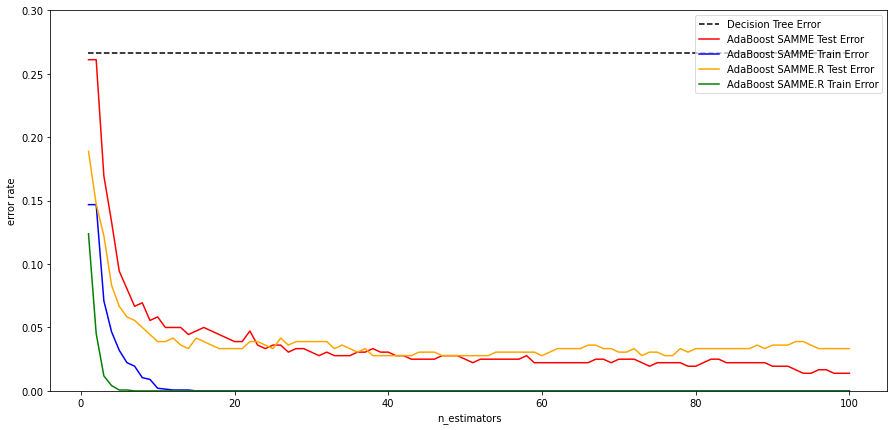

In [50]:
import numpy as np
from sklearn.metrics import zero_one_loss

labels_errors = ['Decision Tree Error', 'AdaBoost SAMME Test Error', 
                 'AdaBoost SAMME Train Error', 'AdaBoost SAMME.R Test Error',
                 'AdaBoost SAMME.R Train Error']

n_estimators=100
plot_scores(*get_errors(X1_train, y1_train, X1_test, y1_test,
                        n_estimators, dtc1, 0.1, 0.1), 
            0.0, 0.3, n_estimators, labels_errors, 'error rate')

Найкращий результат на контольній множині показав алгоритм `SAMME`. Це підтвердило те, що краще використовувати його для даного датасету.   

**Другий датасет make_moons**  
Параметри вказуємо згідно обчислювань у попередніх пунктах.

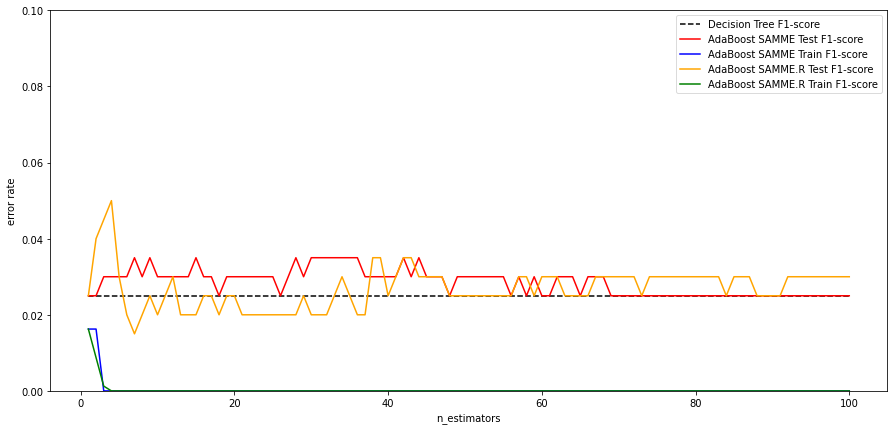

In [83]:
n_estimators = 100

plot_scores(*get_errors(X2_train, y2_train, X2_test, y2_test,
                        n_estimators, dtc2, 1, 1), 
            0.0, 0.1, n_estimators, labels_errors, 'error rate')

Як було видно з попередніх пунтках, обидва алгоритми дають однаковий результат. Графіки відрізняються від перезапускання коду, тому стабільний результат неможливо отримати для точної оцінки.

*   В задачах класифікації побудувати графіки залежності значень міри `F1_score` від значення `n_estimators` для досліджених ансамблів та окремих моделей на одній координатній вісі. Графіки для окремих моделей, очевидно, будуть горизонтальними прямими.  
Для цього напишемо дві функції, за допомогою яких можна побудувати графіки.

In [0]:
def get_f1scores(X_train, y_train, X_test, y_test, n_estimators, average,
              base_estimator, learning_rate1, learning_rate2):

  base_estimator.fit(X_train, y_train)
  base_estimator_score = base_estimator.score(X_test, y_test)

  clf1 = AdaBoostClassifier(base_estimator=base_estimator, 
                            learning_rate=learning_rate1,
                            algorithm='SAMME', n_estimators=n_estimators)
  clf1.fit(X_train, y_train)

  clf2 = AdaBoostClassifier(base_estimator=base_estimator, 
                            learning_rate=learning_rate2,
                            algorithm='SAMME.R', n_estimators=n_estimators)
  clf2.fit(X_train, y_train)

  clf1_score = np.zeros((n_estimators,))
  for i, y_pred in enumerate(clf1.staged_predict(X_test)):
      clf1_score[i] = f1_score(y_pred, y_test, average=average)
  clf1_score_train = np.zeros((n_estimators,))
  for i, y_pred in enumerate(clf1.staged_predict(X_train)):
      clf1_score_train[i] = f1_score(y_pred, y_train, average=average)

  clf2_score = np.zeros((n_estimators,))
  for i, y_pred in enumerate(clf2.staged_predict(X_test)):
      clf2_score[i] = f1_score(y_pred, y_test, average=average)
  clf2_score_train = np.zeros((n_estimators,))
  for i, y_pred in enumerate(clf2.staged_predict(X_train)):
      clf2_score_train[i] = f1_score(y_pred, y_train, average=average)

  return base_estimator_score, clf1_score, \
        clf1_score_train, clf2_score, clf2_score_train

**Перший датасет load_digits**  

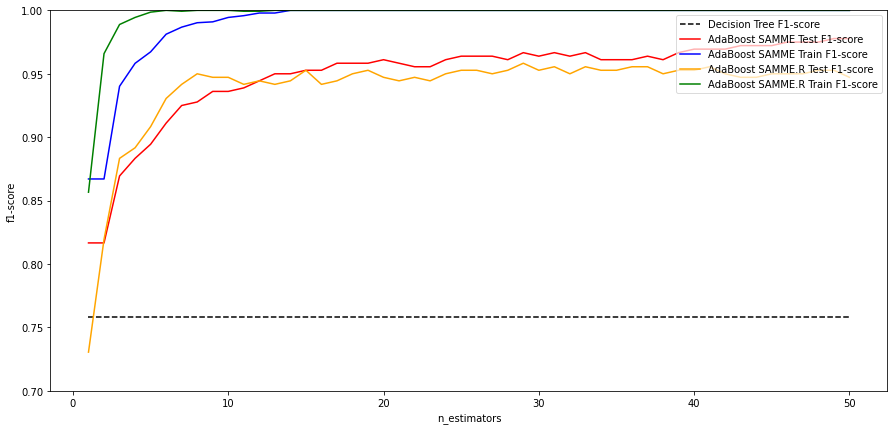

In [84]:
labels_f1score = ['Decision Tree F1-score', 'AdaBoost SAMME Test F1-score', 
                 'AdaBoost SAMME Train F1-score', 
                 'AdaBoost SAMME.R Test F1-score',
                 'AdaBoost SAMME.R Train F1-score']

n_estimators=50
plot_scores(*get_f1scores(X1_train, y1_train, X1_test, y1_test, n_estimators,
                          'micro', dtc1, 0.1, 0.1), 
            0.7, 1, n_estimators, labels_errors, 'f1-score')

На даному графіку видно, що присутнє перенавчання на тренувальній вибірці. З цього можна зробити висновок, що потрібно для цього датасету обережно підбирати параметри, бо модель легко перенавчити.  

**Другий датасет make_moons**

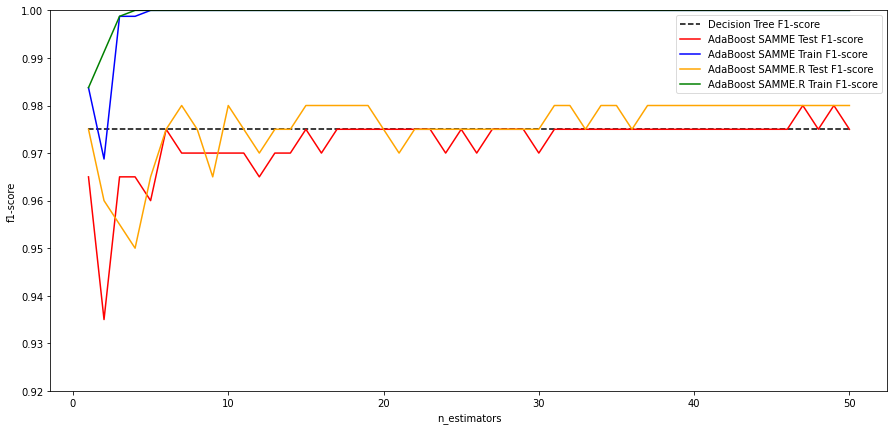

In [88]:
n_estimators=50
plot_scores(*get_f1scores(X2_train, y2_train, X2_test, y2_test, n_estimators,
                          'micro', dtc2, 1, 1), 
            0.92, 1, n_estimators, labels_f1score, 'f1-score')

Як і на першому датасеті, на цьому графіку чітко прослідковується перенавчання.

*   В задачах класифікації відобразити границі рішень `decision boundaries` на основі `base_estimator` та на основі досліджених ансамблів. 